In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#Importing the dataset

df1 = pd.read_csv('../data/products.csv')
#display(df1.head())
print(df1.shape)
df2 = pd.read_csv('../data/aisles.csv')
#display(df2.head())
print(df2.shape)
df3 = pd.read_csv('../data/departments.csv')
#display(df3.head())
print(df3.shape)
df4 = pd.read_csv('../data/order_products__train.csv')
#display(df4.head())
print(df4.shape)
df5 = pd.read_csv('../data/orders.csv')
#display(df5.head())
print(df5.shape)

(49688, 4)
(134, 2)
(21, 2)
(1384617, 4)
(3421083, 7)


In [8]:
df12 = pd.merge(df2, df1, how='inner', on='aisle_id')
df123 = pd.merge(df12, df3, how='inner', on='department_id')
df1234 = pd.merge(df4, df123, how='inner', on='product_id')
df12345 = pd.merge(df5, df1234, how='inner', on='order_id')

df = df12345.drop(['aisle_id','department_id','eval_set','order_number'],axis=1)
display(df.head())
print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))


,order_id,user_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle,product_name,department
0,1187899,1,4,8,14.0,196,1,1,soft drinks,Soda,beverages
1,1187899,1,4,8,14.0,25133,2,1,packaged cheese,Organic String Cheese,dairy eggs
2,1187899,1,4,8,14.0,38928,3,1,yogurt,0% Greek Strained Yogurt,dairy eggs
3,1187899,1,4,8,14.0,26405,4,1,paper goods,XL Pick-A-Size Paper Towel Rolls,household
4,1187899,1,4,8,14.0,39657,5,1,candy chocolate,Milk Chocolate Almonds,snacks



Inference: The Datset consists of 11 features & 1384617 samples.


In [9]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1384617 non-null  int64  
 1   user_id                 1384617 non-null  int64  
 2   order_dow               1384617 non-null  int64  
 3   order_hour_of_day       1384617 non-null  int64  
 4   days_since_prior_order  1384617 non-null  float64
 5   product_id              1384617 non-null  int64  
 6   add_to_cart_order       1384617 non-null  int64  
 7   reordered               1384617 non-null  int64  
 8   aisle                   1384617 non-null  object 
 9   product_name            1384617 non-null  object 
 10  department              1384617 non-null  object 
dtypes: float64(1), int64(7), object(3)
memory usage: 116.2+ MB
None


In [10]:
#Checking number of unique rows in each feature

print(df.nunique().sort_values())


reordered                      2
order_dow                      7
department                    21
order_hour_of_day             24
days_since_prior_order        31
add_to_cart_order             80
aisle                        134
product_id                 39123
product_name               39123
order_id                  131209
user_id                   131209
dtype: int64


In [11]:
#Checking the stats of all the columns

display(df.describe())


,order_id,user_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,1.031128e+05,2.701392e+00,1.357759e+01,1.706613e+01,2.555624e+04,8.758044e+00,5.985944e-01
std,9.897326e+05,5.948715e+04,2.167646e+00,4.238458e+00,1.042642e+01,1.412127e+04,7.423936e+00,4.901829e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.433700e+05,5.173200e+04,1.000000e+00,1.000000e+01,7.000000e+00,1.338000e+04,3.000000e+00,0.000000e+00
50%,1.701880e+06,1.029330e+05,3.000000e+00,1.400000e+01,1.500000e+01,2.529800e+04,7.000000e+00,1.000000e+00
75%,2.568023e+06,1.549590e+05,5.000000e+00,1.700000e+01,3.000000e+01,3.794000e+04,1.200000e+01,1.000000e+00
max,3.421070e+06,2.062090e+05,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,8.000000e+01,1.000000e+00


# Exploratory Data Analysis

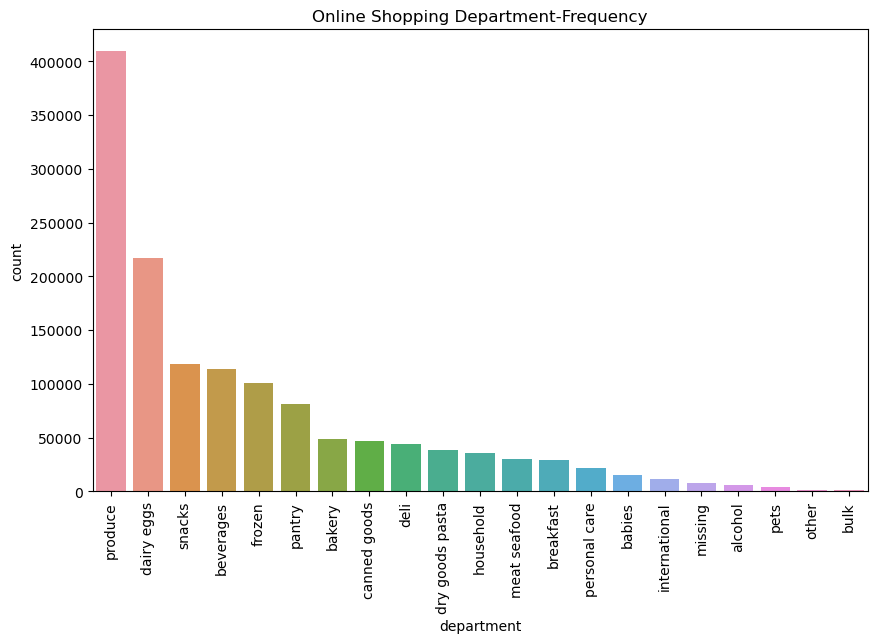

In [17]:
#Let us first analyze the department distribution

# Assuming you have df as your DataFrame
df['department'] = df['department'].astype(str)  # Ensure department is string type

# Reorder the categories by frequency
department_order = df['department'].value_counts().index

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='department', order=department_order)
plt.title('Online Shopping Department-Frequency')
plt.xticks(rotation=90)
plt.show()